Частина 1 Аналіз та підготовка даних\
1) Проаналізуват діапазони значень, їх середні та дисперсію, розподілити, кореляції, наявність пропущених значень, типи ознак.\
2) Перевірити на наявність пропущених значень. За наявності заповнити їх або видали рядки з пропусками.\
3) За наявності бінарних ознак заміни значення цих ознак на 0 та 1.

In [ ]:
#Під'єднуємось до гугл диску
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


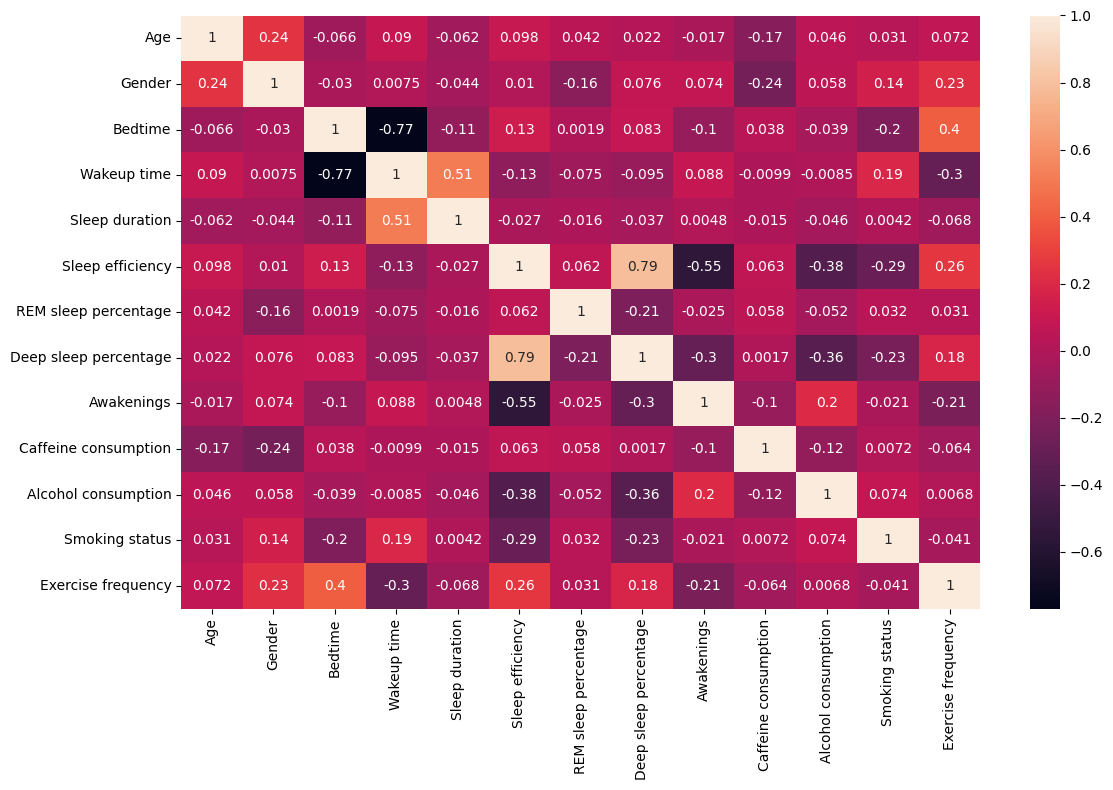

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest

# Шлях до датасету з даними
sleep_efficiency_path = '/content/drive/MyDrive/GoIT/Colab_Notebooks/Sleep_Efficiency.csv'

# Створюємо об'єкт, який міститиме в собі наш датасет
sleep_efficiency_data = pd.read_csv(sleep_efficiency_path)

# Видаляємо стовпчик 'ID', бо він не несе нікої інформації
sleep_efficiency_data.drop(columns=['ID', 'Light sleep percentage' ], inplace=True)

# Дивимось, які рядки треба перетворити в бінарні
# sleep_efficiency_data.info()

# Кодуємо в бінарні ознаки
sleep_efficiency_data['Smoking status'] = sleep_efficiency_data['Smoking status'].map({'No':0,'Yes':1})
sleep_efficiency_data['Gender'] = sleep_efficiency_data['Gender'].map({'Female':0,'Male':1})

# Кодуємо в бінарні ознаки час.
sleep_efficiency_data['Bedtime'] = pd.to_datetime(sleep_efficiency_data['Bedtime'])
sleep_efficiency_data['Wakeup time'] = pd.to_datetime(sleep_efficiency_data['Wakeup time'])
sleep_efficiency_data['Bedtime'] = sleep_efficiency_data['Bedtime'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))
sleep_efficiency_data['Wakeup time'] = sleep_efficiency_data['Wakeup time'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))

# Шукаємо пусті значення, та бачимо, що вони в стовпчиках Awakenings, Caffeine consumption, Alcohol consumption, Exercise frequency.
sleep_efficiency_data.isna().mean()

# Заповнюємо пусті значення середніми в стовпчиках  wakenings, Caffeine consumption, Alcohol consumption, Exercise frequency.
sleep_efficiency_data['Awakenings'] = sleep_efficiency_data['Awakenings'].fillna(sleep_efficiency_data['Awakenings'].mean())
sleep_efficiency_data['Caffeine consumption'] = sleep_efficiency_data['Caffeine consumption'].fillna(sleep_efficiency_data['Caffeine consumption'].mean())
sleep_efficiency_data['Alcohol consumption'] = sleep_efficiency_data['Alcohol consumption'].fillna(sleep_efficiency_data['Alcohol consumption'].mean())
sleep_efficiency_data['Exercise frequency'] = sleep_efficiency_data['Exercise frequency'].fillna(sleep_efficiency_data['Exercise frequency'].mean())

# Робимо додаткову перевірку на пусті значення, бачимо, що їх немає.
sleep_efficiency_data.isna().mean()

# Шукаємо середні за допомоги окремої команди
means = sleep_efficiency_data.mean()

# Шукаємо середні за допомоги окремої команди
variances = sleep_efficiency_data.var()

#Вивід розподілу
sleep_efficiency_data.describe()

#Побудуємо корелції
sleep_efficiency_data.corr()

# Вищенаведены кореляції є не дуже зручними, тому краще побудуємо HeatMap
fig, ax = plt.subplots(figsize=(12,  8))
sns.heatmap(sleep_efficiency_data.corr(), annot=True, ax=ax)
fig.tight_layout()







Частина 2 Моделювання\
1) Створи як мінімум 2 різні регресійні моделі для прогнозування цільової змінної “Sleep efficiency” .\
2) Оціни якість моделей як мінімум за 2 метриками.\


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Розділіть дані на ознаки (features) та цільову змінну (target)
features = sleep_efficiency_data.drop(columns=['Sleep efficiency'])
target = sleep_efficiency_data['Sleep efficiency']

# Розділіть дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Модель 1: Проста лінійна регресія
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

# Модель 2: Дерево рішень
model_dt = DecisionTreeRegressor(random_state=1)
model_dt.fit(X_train, y_train)
predictions_dt = model_dt.predict(X_test)

# Оцінка моделей за допомогою різних метрик
mse_lr = mean_squared_error(y_test, predictions_lr)
mae_lr = mean_absolute_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

mse_dt = mean_squared_error(y_test, predictions_dt)
mae_dt = mean_absolute_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)

print("Проста лінійна регресія:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R^2:", r2_lr)
percentage_errors = abs(predictions_lr - y_test) / y_test * 100

# Виведення середнього відсотка відхилення
mean_percentage_error = percentage_errors.mean()
print("Середній відсоток відхилення:", mean_percentage_error)
print("\n")

print("Дерево рішень:")
print("MSE:", mse_dt)
print("MAE:", mae_dt)
print("R^2:", r2_dt)
percentage_errors = abs(predictions_dt - y_test) / y_test * 100

# Виведення середнього відсотка відхилення
mean_percentage_error = percentage_errors.mean()
print("Середній відсоток відхилення:", mean_percentage_error)
print("\n")

Проста лінійна регресія:
MSE: 0.0038916839282671
MAE: 0.05094158840083353
R^2: 0.7909727012990342
Середній відсоток відхилення: 6.895583375974722


Дерево рішень:
MSE: 0.004074725274725275
MAE: 0.045714285714285714
R^2: 0.7811413175314996
Середній відсоток відхилення: 6.104443409705588




Частина 3. Аналіз результатів\
1) Для всіх моделей побудувати графіки порівняння справжніх та спрогнозованих даних.\
2) Зробити висновки, на яких прикладах кожна модель більше помиляється.\
3) Зробити порівняння якості моделей. Напиши висновки.

На основі даних можна зробити такі висновки:\
1) Проста лінійна регресія має менші значення середньоквадратичної помилки (MSE) та середньої абсолютної помилки (MAE) порівняно з деревом рішень. Це може свідчити про те, що проста лінійна регресія у цьому конкретному випадку прогнозує цільову змінну краще.\
2) Значення коефіцієнта детермінації (R^2) дещо вище для простої лінійної регресії, що означає, що ця модель краще пояснює зміну у цільовій змінній за допомогою вхідних ознак.\
3) Однак середній відсоток відхилення для дерева рішень нижчий, що свідчить про те, що ця модель помиляється менше у прогнозуванні цільової змінної на тестовому наборі даних.\

Отже, враховуючи всі ці фактори, можна зробити висновок, що в даному випадку дерево рішень може бути кращим вибором для прогнозування цільової змінної, незважаючи на те, що проста лінійна регресія показує кращі показники MSE та MAE.

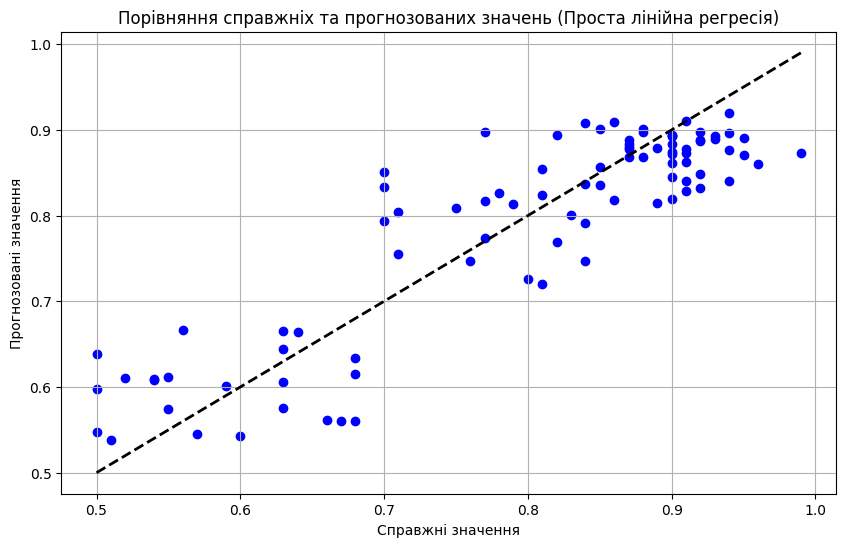

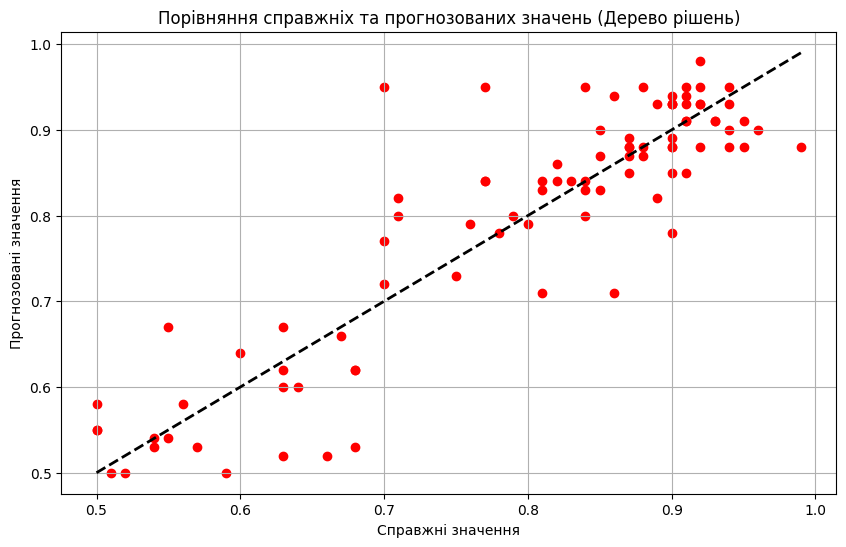

In [ ]:

import matplotlib.pyplot as plt

# Графік для простої лінійної регресії
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Порівняння справжніх та прогнозованих значень (Проста лінійна регресія)')
plt.grid(True)
plt.show()

# Графік для дерева рішень
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_dt, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Порівняння справжніх та прогнозованих значень (Дерево рішень)')
plt.grid(True)
plt.show()